In [1]:
#/default_exp app

In [6]:
!pip install -Uqq fastai
!pip install gradio
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 6.6 MB/s eta 0:00:0000:0100:01


In [7]:
#/export
from fastai.vision.all import *
import gradio as gr
import timm

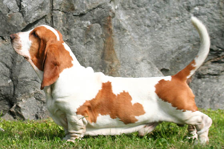

In [9]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [10]:
#/export
learn = load_learner('model.pkl')

In [11]:
learn.predict(im)

('basset_hound',
 TensorBase(14),
 TensorBase([2.5903e-05, 5.2079e-06, 5.3178e-08, 7.3996e-08, 2.8097e-08,
             3.1790e-07, 2.3100e-07, 4.0508e-07, 1.3052e-08, 2.8310e-07,
             8.4449e-08, 6.2096e-06, 8.2867e-07, 2.0614e-06, 9.9954e-01,
             3.7153e-04, 1.6994e-05, 3.3040e-09, 2.1437e-07, 1.7509e-07,
             7.2650e-07, 1.9827e-09, 1.2914e-07, 1.2216e-07, 9.5545e-08,
             3.7168e-07, 1.4133e-07, 2.8880e-09, 2.4999e-09, 2.9504e-07,
             2.4402e-05, 2.3294e-07, 6.4638e-08, 1.7161e-08, 7.6135e-09,
             1.6364e-07, 3.6076e-08]))

In [12]:
#/export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [14]:
classify_image(im)

{'Abyssinian': 2.5903433197527193e-05,
 'Bengal': 5.207896720094141e-06,
 'Birman': 5.317824758321876e-08,
 'Bombay': 7.399577128808232e-08,
 'British_Shorthair': 2.8097254300973873e-08,
 'Egyptian_Mau': 3.1790077059667965e-07,
 'Maine_Coon': 2.3100041346424405e-07,
 'Persian': 4.050836537317082e-07,
 'Ragdoll': 1.3052438241345499e-08,
 'Russian_Blue': 2.831005190273572e-07,
 'Siamese': 8.444926891115756e-08,
 'Sphynx': 6.209576895344071e-06,
 'american_bulldog': 8.286742740892805e-07,
 'american_pit_bull_terrier': 2.0614245386241237e-06,
 'basset_hound': 0.9995425939559937,
 'beagle': 0.0003715275670401752,
 'boxer': 1.699365566310007e-05,
 'chihuahua': 3.3040215008384166e-09,
 'english_cocker_spaniel': 2.1437377029087656e-07,
 'english_setter': 1.7508611449557065e-07,
 'german_shorthaired': 7.264983992172347e-07,
 'great_pyrenees': 1.982744635142808e-09,
 'havanese': 1.2914213698422827e-07,
 'japanese_chin': 1.221573171505952e-07,
 'keeshond': 9.554546664958252e-08,
 'leonberger': 3.

In [15]:
#export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [16]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f2c43f69f10>, 'http://127.0.0.1:7860/', None)